<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [4]:
%matplotlib inline
import matplotlib
import pandas as pd
import networkx as nx
import statistics
import numpy as np
import networkx.algorithms.link_prediction
import matplotlib.pyplot as plt
#εισαγωγή δεδομένων
df = pd.read_fwf("out.dbpedia-similar")
df = df.drop([0], axis=0)
df = df.rename(columns={"% sym unweighted": ""})

#δημιουργία γράφου και εύρεση όμοιων ακμών
G=nx.Graph()
pairs_of_nodes=[]
nodes=[]
for row in df.itertuples(index=False):
    pairs_of_nodes.append(row[0].split(' '))
same_edges=0
for i in range(0,len(pairs_of_nodes)):
    search=pairs_of_nodes[i]
    search1=pairs_of_nodes[i].reverse()
    if search1 in pairs_of_nodes:
        same_edges=same_edges+1
        continue
    if search in pairs_of_nodes:
        if(i!=pairs_of_nodes.index(search)):
            same_edges=same_edges+1
            continue
    if pairs_of_nodes[i][0]==pairs_of_nodes[i][1]:
        same_edges=same_edges+1
print('same edges:',same_edges)
for i in range(0,len(pairs_of_nodes)):
    pairs_of_nodes[i].reverse()
G.add_edges_from(pairs_of_nodes)

#αφαίρεση κόμβου 420 και ακμής (420,420)
G.remove_edge('420','420')
print('The isolates are :',list(nx.isolates(G)))
G.remove_node('420')

#έυρεση αριθμού κόμβων,ακμών,μέσου βαθμού και connected components
initial_node_count= len(G.nodes)
print('inital node count:',initial_node_count)
initial_edge_count= len(G.edges)
print('initial edge count:',initial_edge_count)
degree= nx.degree_centrality(G)
initial_mean_degree_centrality= statistics.mean(list(degree.values()))
print('mean degree:',initial_mean_degree_centrality)
initial_connected_components= nx.number_connected_components(G)
print('connected components:',initial_connected_components)

#αλλαγή ονομάτων κόμβων και αποθήκευση mapping
G_mapping=dict(enumerate(G.nodes,0))
G = nx.convert_node_labels_to_integers(G,first_label=0)

same edges: 1
The isolates are : ['420']
inital node count: 429
initial edge count: 564
mean degree: 0.0061433893209594135
connected components: 94


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [5]:
def reverse_tuple(tuples):
    new_tup = tuples[::-1]
    return new_tup
#δημιουργία πίνακα γειτνίασης
matrix = nx.to_numpy_matrix(G)
matrix1 = np.asarray(matrix)
#επιλογή άνω τριγώνου
matrix1=np.triu(matrix1, 0)

#εύρεση ακμών που δεν υπάρχουν
unconnected=0
pairs=[]
pairs1=[]
for i in range(0,len(matrix1)):
    for j in range(i+1,len(matrix1[i])):
        if(matrix1[i][j]==0):
            unconnected=unconnected+1
            pairs.append(tuple([str(i),str(j)]))
print(unconnected)

91242


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [6]:
# removable edges: check splitting and number of nodes
#εύρεση ελάχιστου συνδετικού δέντρου
list_of_edges=list(G.edges)
removable=[]    
T=nx.minimum_spanning_tree(G, weight='weight', algorithm='prim', ignore_nan=False)
#έλεγχος κόμβων και connected components
print("Remaining connected components:",nx.number_connected_components(T))
print("Remaining nodes:",len(T.nodes))
#δημιουργία συνόλων removable και remaining
remaining=[]
for i in list_of_edges:
    a=tuple(i)
    if a in list(T.edges):
        remaining.append(a)
    else:
        list(a)
        b=tuple([str(a[0]),str(a[1])])
        removable.append(b)

Remaining connected components: 94
Remaining nodes: 429


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [7]:
#δημιουργία δεδομένων removables
link1=[]
dummy_x=[]
dummy_y=[]
for i in range(0,len(removable)):
    dummy_x.append(removable[i][0])
    dummy_y.append(removable[i][1])
    link1.append(1)

#δημιουργία δεδομένων unconnected
dummy_w=[]
dummy_z=[]
link2=[]
for i in range(0,len(pairs)):
    dummy_w.append(str(pairs[i][0]))
    dummy_z.append(str(pairs[i][1]))
    link2.append(0)

#dataframe of removable edges (they will function as positive samples)
df1 = pd.DataFrame(list(zip(dummy_x, dummy_y, link1)))
print(df1)

#dataframe of unconnected node pairs (they will function as negative samples)
df2 = pd.DataFrame(list(zip(dummy_w, dummy_z, link2)))
print(df2)

for i in range(0,len(dummy_w)):
    dummy_x.append(dummy_w[i])
for j in range(0,len(dummy_z)):
    dummy_y.append(dummy_z[j])
for j in range(0,len(link2)):
    link1.append(link2[j])

#merge in one dataframe
df3= pd.DataFrame(list(zip(dummy_x,dummy_y,link1)))
print(df3)

#build graph G'=G_reduced
G_reduced=nx.Graph()
G_reduced.add_edges_from(remaining)

#απεικόνιση ζητούμενων μεγεθών
total_nodes=len(list(G_reduced.nodes))
print(total_nodes)
total_edges=len(list(G_reduced.edges))
print(total_edges)
degree= nx.degree_centrality(G_reduced)
mean_degree_centrality= statistics.mean(list(degree.values()))
print(mean_degree_centrality)
connected_components= nx.number_connected_components(G_reduced)
print(connected_components)
df3_dict={}
for i in range(0,len(link1)):
    a = tuple([dummy_x[i],dummy_y[i]])
    df3_dict[a] = link1[i]

       0    1  2
0      1    2  1
1      2    3  1
2      2    4  1
3      3    5  1
4      4    5  1
..   ...  ... ..
224  401  403  1
225  401  404  1
226  402  403  1
227  402  404  1
228  403  404  1

[229 rows x 3 columns]
         0    1  2
0        0    5  0
1        0    6  0
2        0    7  0
3        0    8  0
4        0    9  0
...    ...  ... ..
91237  424  428  0
91238  425  426  0
91239  425  427  0
91240  425  428  0
91241  427  428  0

[91242 rows x 3 columns]
         0    1  2
0        1    2  1
1        2    3  1
2        2    4  1
3        3    5  1
4        4    5  1
...    ...  ... ..
91466  424  428  0
91467  425  426  0
91468  425  427  0
91469  425  428  0
91470  427  428  0

[91471 rows x 3 columns]
429
335
0.0036489989761017794
94


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

The k edges are : {('427', '428'): 1.0, ('422', '423'): 1.0, ('417', '418'): 1.0, ('406', '407'): 1.0, ('403', '404'): 1.0, ('402', '404'): 1.0, ('402', '403'): 1.0, ('401', '404'): 1.0, ('401', '403'): 1.0}
TN + FP : 91242
TN + FP : 91242
TN + FP : 91242
TN + FP : 91242
TN + FP : 91242


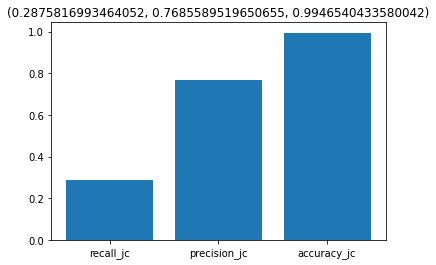

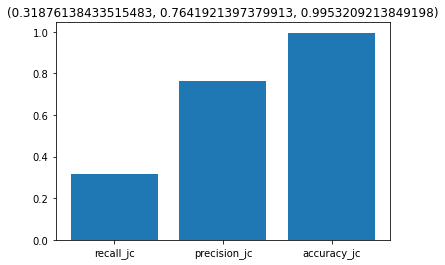

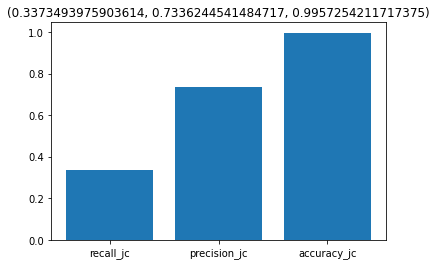

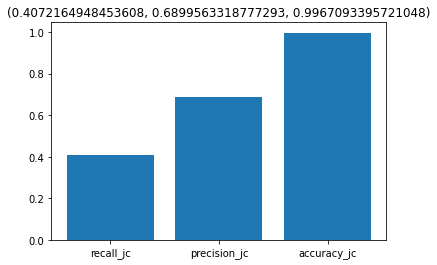

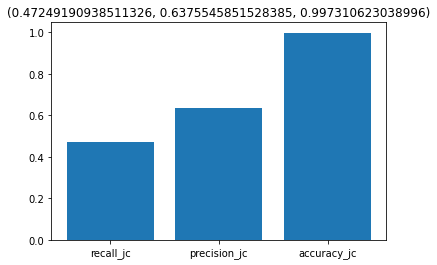

In [8]:
#υπολογισμός μετρικής jc
jc= nx.jaccard_coefficient(G_reduced, ebunch=None)
jc_results=[]
for i in jc:
    jc_results.append(i)
k=9    
jc_dict={}
for i in range(0,len(jc_results)):
    a=tuple([str(jc_results[i][0]),str(jc_results[i][1])])
    jc_dict[a]=jc_results[i][2]    

#ταξινόμηση αποτελεσμάτων με βάση την τιμή
jc_dict={k: v for k, v in sorted(jc_dict.items(), key=lambda item: item[1])}

#υπολογισμός των 9 ακμών με τη μεγαλύτερη τιμή μετρικής
k_dict={}
k_indexes=list(jc_dict.keys())
k_values=list(jc_dict.values())
k_indexes.reverse()
k_values.reverse()
for i in range(0,9):
    k_dict[k_indexes[i]]= k_values[i]         
print('The k edges are :',k_dict)

#εύρεση απόδοσης μετρικής
jc = list(jc_dict.values())
jc_keys = list(jc_dict.keys())
df3_values = list(df3_dict.values())
df3_keys = list(df3_dict.keys())
def function(threshold_jc):   
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in jc_keys:
        if i in df3_keys:
            a=i
        else:
            a=reverse_tuple(i)
        if((jc_dict[i]>=threshold_jc) & (df3_dict[a]==1)):
            tp = tp + 1
        elif((jc_dict[i]<threshold_jc) & (df3_dict[a]==0)):
            tn = tn + 1
        elif((jc_dict[i]<threshold_jc) & (df3_dict[a]==1)):
            fn = fn + 1
        elif((jc_dict[i]>=threshold_jc) & (df3_dict[a]==0)):
            fp = fp + 1
    recall_jc= tp/(tp+fp)
    precision_jc= tp/(tp+fn)
    accuracy_jc= (tp+tn)/(tp+tn+fn+fp)
    print("TN + FP :",(tn+fp))
    return recall_jc, precision_jc, accuracy_jc 

#απεικόνιση αποτελεσμάτων
thresholds=[0.1, 0.15, 0.25, 0.5, 1.0]
labels=['recall_jc','precision_jc','accuracy_jc']
final_results=[]
for i in range(0,len(thresholds)):
    final_results.append(function(thresholds[i]))
for i in range(0,len(thresholds)):
    plt.title(final_results[i])
    plt.bar(range(len(labels)),list(final_results[i]),tick_label=labels)
    plt.show()

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

Σχετικά με τη συχέτιση μπορούμε να δοκιμάσουμε σε κάθε πιθανό συνδυασμό των τριών μεταβλητών (μετρικών) να ελεγχθεί η συσχέτιση κατά Pearson με μια εντολή της μορφής:

<code>scipy.stats.pearsonr(x, y)</code>

Περιμένουμε να μας επιστραφεί μια τιμή συσχέτισης από -1 έως το 1 όπου μια αρνητική τιμή υποδεικνύει πλήρως αρνητική συσχέτιση, μια θετική πλήρως θετική συσχέτιση και η τιμή 0 καμία συσχέτιση.

In [9]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
df4 = df3.copy()

In [10]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient
jc = nx.jaccard_coefficient(G_reduced, ebunch=None)
jc_results=[]
for i in jc:
    jc_results.append(i)
#Preferential Attachment
pa = nx.preferential_attachment(G_reduced, ebunch=None)
pa_results=[]
for i in pa:
    pa_results.append(i)
#Resource Allocation
ra = nx.resource_allocation_index(G_reduced, ebunch=None)
ra_results=[]
for i in ra:
    ra_results.append(i)
#διαχωρισμός ακμών και τιμών μετρικής
def sort_results(result_list):
    result_dict={}
    for i in range(0,len(jc_results)):
        a=tuple([str(result_list[i][0]),str(result_list[i][1])])
        result_dict[a]=result_list[i][2] 
    b=list(result_dict.keys())
    c=list(result_dict.values())
    return b,c
jc_sorted=sort_results(jc_results)
pa_sorted=sort_results(pa_results)
ra_sorted=sort_results(ra_results)
#έλεγχος
#for i in range(0,len(jc_sorted)):
#    if jc_sorted[0][i]==pa_sorted[0][i] and jc_sorted[0][i]==ra_sorted[0][i]:
#        continue
#    else:
#        print('no')
index_col=jc_sorted[0]
jc_col=jc_sorted[1]
pa_col=pa_sorted[1]
ra_col=ra_sorted[1]
#περισσότερος έλεγχος
#print(jc_results[1000],pa_results[1000],ra_results[1000])
#print(index_col[1000],jc_col[1000],pa_col[1000],ra_col[1000])

#εισαγωγή δεδομένων από το dataframe
data=[]
for row in df4.itertuples(index=False):
    data.append(row[0:len(row)])
    
data_sorted=sort_results(data)

#επεξεργασία δεδομένων dataframe
dummy_dict={}
for i in range(0,len(index_col)):
    if data_sorted[0][i] in index_col:
        target=index_col.index(data_sorted[0][i])
        dummy_dict[target]=data_sorted[1][i]
    else:
        rev=reverse_tuple(data_sorted[0][i])
        target=index_col.index(rev)
        dummy_dict[target]=data_sorted[1][i]

In [11]:
#δημουργία dataframe
#print(dummy_dict)
link_col={}
for i in sorted (dummy_dict) :
    link_col[i]=dummy_dict[i]
link_col=list(link_col.values())
#έλεγχος
#index=index_col.index(tuple(['2','3']))
#print(index_col[index],jc_col[index],pa_col[index],ra_col[index],link_col[index])
#print(jc_results[index],pa_results[index],ra_results[index])
df4 = df4.drop(columns=0)
df4 = df4.drop(columns=1)
df4 = df4.drop(columns=2)
df4.index = index_col
df4['link'] = link_col
df4['Jacc. Coeff.'] = jc_col
df4['Pr. Attachment'] = pa_col
df4['Resource Allocation'] = ra_col 
print(df4)

            link  Jacc. Coeff.  Pr. Attachment  Resource Allocation
(0, 5)         0      0.166667              12                 0.50
(0, 6)         0      0.250000               4                 0.25
(0, 7)         0      0.250000               4                 0.25
(0, 8)         0      0.250000               4                 0.25
(0, 9)         0      0.000000              36                 0.00
...          ...           ...             ...                  ...
(424, 428)     0      0.000000               1                 0.00
(425, 426)     0      0.000000               2                 0.00
(425, 427)     0      0.000000               1                 0.00
(425, 428)     0      0.000000               1                 0.00
(427, 428)     0      1.000000               1                 0.50

[91471 rows x 4 columns]


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [12]:
#uncomment whole cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
X = df4[['Jacc. Coeff.','Pr. Attachment','Resource Allocation']]       #features, uncomment and complete
y = df4['link'] #target, uncomment and complete

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) #uncomment and complete

In [13]:
#uncomment whole cell
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [14]:
model.fit(X_train_scaled,y_train )#train the model, uncomment and complete

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [15]:
predictions = model.predict(X_test_scaled)       #uncomment
a=predictions[:9]
print(a) #get 9 first predictions, uncomment and complete
print(accuracy_score(y_test, predictions))

[0 0 0 0 0 0 0 0 0]
0.9985569354556586


In [16]:
print(df4[['Jacc. Coeff.','Pr. Attachment','Resource Allocation']].loc[[('0', '7')]])
predict_proba = model.predict_proba(df4[['Jacc. Coeff.','Pr. Attachment','Resource Allocation']].loc[[('0', '7')]]) #uncomment and complete
print(predict_proba)

        Jacc. Coeff.  Pr. Attachment  Resource Allocation
(0, 7)          0.25               4                 0.25
[[0.87004523 0.12995477]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Παρατηρούμε πως όντως η ακμή κατατάσσεται στο σύνολο των unconnected pairs.

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [17]:
!pip install node2vec 
from node2vec import Node2Vec   #uncomment
import multiprocessing          #uncomment

#generate walks
node2vec_walker = Node2Vec(G_reduced,p=1.0 ,q=1.0 ,dimensions=128 ,num_walks=10 ,walk_length=80 ,workers=multiprocessing.cpu_count() ) #uncomment and complete

#train node2vec model
n2v_model = node2vec_walker.fit(window=10 , min_count=1) #uncomment and complete

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5978 sha256=b8bbdb1ee4113f2547199918758ee94f6bd8d629c5494884e8ded6749eb5b89d
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


Computing transition probabilities:   0%|          | 0/429 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [18]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
df_with_target_var=df3.copy()
df_with_target_var['node_1']=df3[0]
df_with_target_var['node_2']=df3[1]
df_with_target_var['link']=df3[2]
df_with_target_var.pop(0)
df_with_target_var.pop(1)
df_with_target_var.pop(2)
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]
y = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)])/2 for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]
z = [(n2v_model.wv[str(i)]*n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]
w = [(n2v_model.wv[str(i)]-n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]
l = [(n2v_model.wv[str(i)]-n2v_model.wv[str(j)])**2 for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, df_with_target_var['link'], random_state = 0)  #uncomment and complete
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(y, df_with_target_var['link'], random_state = 0)
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(z, df_with_target_var['link'], random_state = 0)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(w, df_with_target_var['link'], random_state = 0)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(l, df_with_target_var['link'], random_state = 0)

In [20]:
#uncomment whole cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   #uncomment and complete
predictions = classifier.predict(X_test)
print(accuracy_score(y_test, predictions))
classifier1 = RandomForestClassifier(max_depth=2, random_state=0) 
classifier1.fit(X_train_y,y_train_y)
predictions_y=classifier1.predict(X_test_y)
print(accuracy_score(y_test_y,predictions_y))
classifier2 = RandomForestClassifier(max_depth=2, random_state=0) 
classifier2.fit(X_train_z,y_train_z)
predictions_z=classifier2.predict(X_test_z)
print(accuracy_score(y_test_z,predictions_z))
classifier3 = RandomForestClassifier(max_depth=2, random_state=0) 
classifier3.fit(X_train_w,y_train_w)
predictions_w=classifier1.predict(X_test_w)
print(accuracy_score(y_test_w,predictions_w))
classifier4 = RandomForestClassifier(max_depth=2, random_state=0) 
classifier4.fit(X_train_l,y_train_l)
predictions_l=classifier1.predict(X_test_l)
print(accuracy_score(y_test_l,predictions_l))

0.998600664684275
0.998600664684275
0.998600664684275
0.9968514955396187
0.9975511631974812


<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>